# Lab 3.1: Radar Transmissions and Receptions

In [1]:
%matplotlib widget
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

In this lab, we will dive into two of the boxes in the basic radar system diagram: *transmitters* and *receivers*. The transmitter decides how and where to emit energy, and the receiver decides how and where to listen for echoes.

<div style="text-align: center"> <img src="img/radar_sys2.png" justify="center" width="700px"></img> </div>

Following the order of the diagram, we will first focus on transmissions and how they are designed, then move on to receptions.

## Radar Transmissions

There are three main design options (often called *degrees-of-freedom*) when choosing how to emanate energy out of a radar:

- **Waveform**: Shape of the transmitted wave
- **Space**: Region to concentrate transmitted energy
- **Polarization**: Orientation of the transmitted wave relative to direction of travel

We will go over each of these in detail.

<div style="text-align: center"> <img src="img/tx_dof.png" justify="center" width="900px"></img> </div>

### Waveform

Let us first study the *waveform* of a transmission, or the shape of the wave being emitted, dictated by the electrical signal driving the transmit antenna. In [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we introduced the basics of ranging via a hypothetical sensor that could transmit an impulse, i.e., a very short burst of energy (see figure below). The impulse would propagate outward, impinge on a target, and then an echo of the impulse propagates back to the sensor. 

<div style="text-align: center"> <img src="img/impulse.png" justify="center" width="400px"></img> </div>

An impulse is an idealized shape for a wave as it allows for arbitrarily high precision while estimating the time at which a target echo arrives; however, compressing electromagnetic energy into a very short duration requires a transmitter with an extremely large amount of power (i.e., power is the rate that energy is transmitted), which is impractical for most applications.

To avoid requiring extremely high power, the transmitted energy is typically spread out over time. To see how this is done, we will look at the basic radar wave shape: the pulsed sine wave.

<div style="text-align: center"> <img src="img/sine_pulse.png" justify="center" width="400px"></img> </div>

In the above figure, we see a time-limited sine wave that is characterized by its frequency, $f$ , amplitude, $a$ , and **pulsewidth**, $t_p$ , where the pulsewidth is the duration of the pulse. Note that the energy contained in a sine wave is $\mathcal{E}_t = a^2 t_p / 2$; thus, increasing the amplitude or pulsewidth will increase the amount of transmit energy.

In the following interactive example, we will look at designing a single sine wave pulse to impart a desired amount of transmit energy. The adjustable parameters of the pulsed sine wave are *<font color="DarkBlue">Transmit Energy</font>*, *<font color="DarkBlue">Transmit Frequency</font>*, and *<font color="DarkBlue">Pulsewidth</font>*. The maximum instantaneous power, called the **peak power**, is shown as a **black** dashed line.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=50.0…

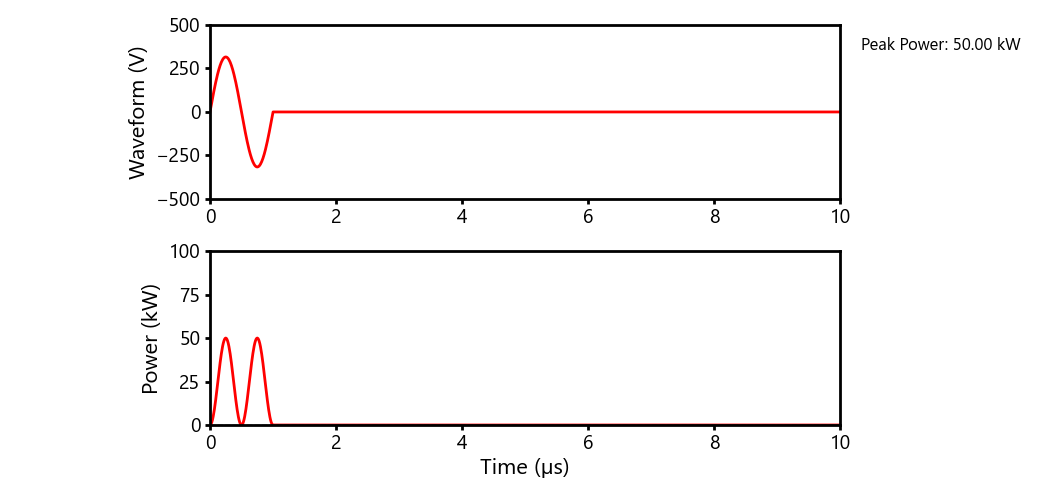

In [2]:
ex.ex_3_1_1()

We can see as the pulsewidth increases, the peak power of the wave decreases; this is because the energy is being spread out over a longer time span. The peak power is a major design aspect of a transmitter (more specifically, a component called an *amplifier* which creates high power sinusoidal signals to be emitted). The higher the peak power required of a transmitter, the more sophisticated and expensive it will be. Therefore, if we can tolerate long pulsewidths, we can build a cheaper system because less peak power is required to achieve a desired amount of transmit energy.

***

### Question 1

What pulsewidth, $t_p$ , is needed to get peak power below $7~\mathrm{kW}$ when using a transmit energy of $\mathcal{E}_t = 50~\mathrm{mJ}$ at transmit frequency $f = 4~\mathrm{MHz}$? 

In [3]:
qz.quiz_3_1_1()

In [4]:
# Scratch space

***

Radar systems traditionally transmit pulses at a chosen rate, called the **pulse repetition frequency** (PRF), $f_{rep}$ , and listen for echoes in between pulses. The inverse of this is the **pulse repetition interval** (PRI), $t_{rep}$ , which is the amount of time total for one transmission and one listening period. Mathematically, we have

$$
f_{rep} = \frac{1}{t_{rep}}
$$

For instance, if a radar transmits using a PRF of $f_{rep} = 2~\mathrm{Hz}$ (i.e., a pulse repetition interval of $t_{rep} = 0.5~\mathrm{s}$), it sends a pulse once every half-second and uses the duration in between to search for target responses. The ratio of the time transmitting versus total operational time is called the **duty cycle**, $d$ , and it gives a notion of how much of the radar's operation is dedicated to actively transmitting. The duty cycle can be calculated as the ratio of the pulsewidth, $t_p$ , to the pulse repetition interval, $t_{rep}$ :

$$
d = \frac{t_p}{t_{rep}}
$$

The structure of multiple radar transmissions can be seen in the following figure:

<div style="text-align: center"> <img src="img/sine_pulse_multi.png" justify="center" width="750px"></img> </div>

To look at the transmissions of a radar over multiple pulses, we will study the following interactive example. This example is very similar to the previous pulsed sine wave example, except now we are transmitting multiple pulses. To the right side, we can also see the duty cycle of the radar system.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=50.0…

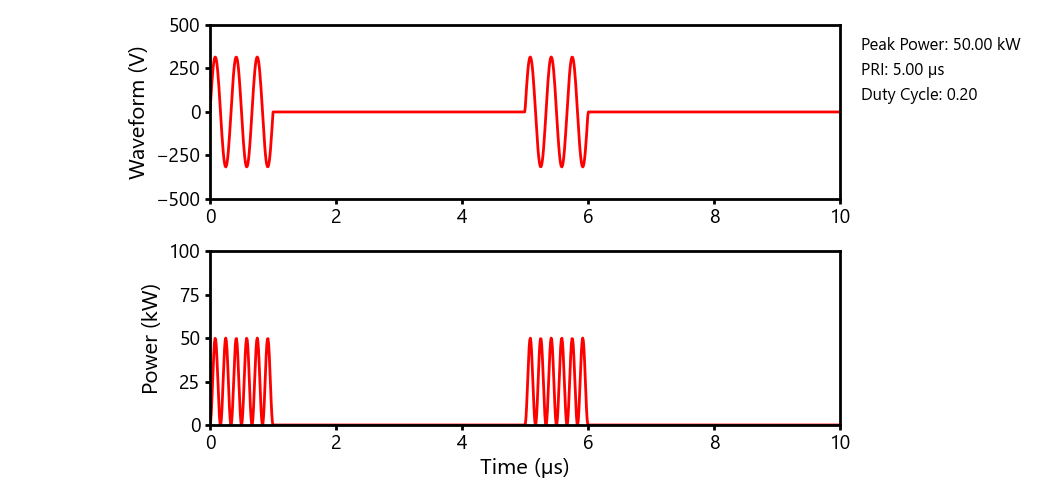

In [5]:
ex.ex_3_1_2()

We can notice that the pulsewidth, $t_p$ , can only get as large as the PRI, $t_{rep}$ , before it no longer becomes a pulsed signal.

***

### Question 2

**(a)** What is the pulse repetition interval, $t_{rep}$ , for a system with pulse repetition frequency $f_{rep} = 10~\mathrm{kHz}$?

In [6]:
qz.quiz_3_1_2a()

In [7]:
# Scratch space

**(b)** What is the duty cycle, $d$ , for a radar that uses a pulsewidth of $t_p = 150~\mu\mathrm{s}$ and a pulse repetition frequency of $f_{rep} = 1~\mathrm{kHz}$?

In [8]:
qz.quiz_3_1_2b()

In [9]:
# Scratch space

***

The pulsed sine wave was a very common waveform for early radar systems due to its simplicity; however, modern radar systems use variations on sine waves created by **modulation**. *Modulation* is achieved by using a base sine wave and altering it with another signal (typically via multiplication). Some common forms of modulation used in radar are:

- **Linear frequency modulation** (LFM), sweeps from one frequency to another over the course of the pulse (also known as a *chirp* waveform)
- **Coded waveforms**, creates a sequence of base sine wave pulses but with varying phases and frequencies

In the interactive example below, we will look at the most common radar waveform used in modern systems: the LFM waveform. Try changing the *<font color="DarkBlue">Start Frequency</font>* and *<font color="DarkBlue">Stop Frequency</font>* to see how the sine wave sweeps from one to another. In the next section on radar receptions, we will discuss why sweeping over multiple frequencies is important.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=50.0…

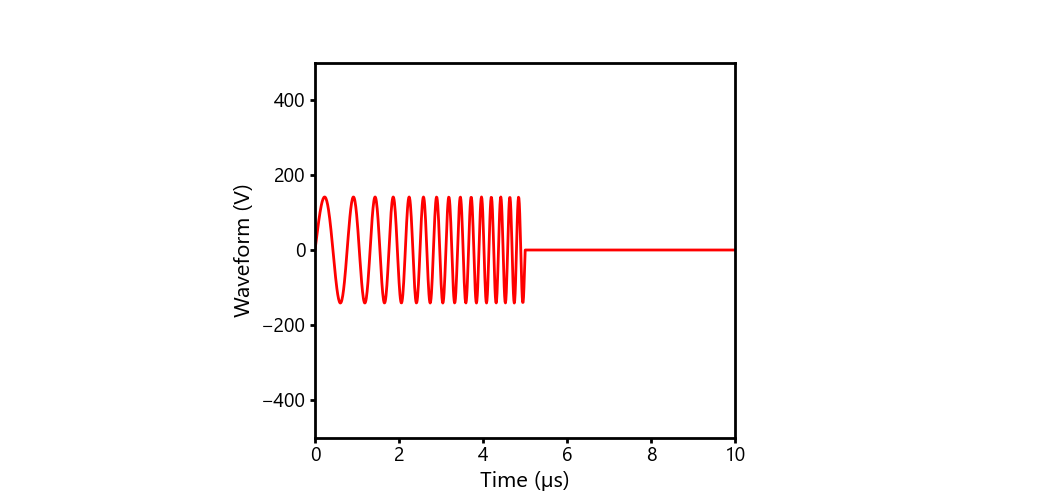

In [10]:
ex.ex_3_1_3()

### Space

From [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we know that radars use directed ranging to be able to simultaneously estimate the range and angle of a target. Directed ranging is performed by focusing energy into a beam and then steering the beam in a desired direction. Therefore, choosing the spatial degree-of-freedom for a radar transmission is the same as focusing the energy and steering it to a desired region.

<div style="text-align: center"> <img src="img/focus_steer.png" justify="center" width="500px"></img> </div>

Focusing in radar systems follows the same logic as the generic ranging systems in [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb): 

- An aperture is used to concentrate energy in a swath of angle
- As aperture extent/area increases relative to the wavelength, the beam narrows and the gain increases

In reality, a radar system will not be able to focus its energy perfectly into a beam, it will transmit some energy outside of the main beamwidth. This can be seen by investigating a radar's **beam pattern**. A beam pattern shows the strength of transmission as a function of angle. Below is an interactive plot showing the beam pattern for a dish radar with a circular aperture; try changing the *<font color="DarkBlue">Dish Radius</font>* and *<font color="DarkBlue">Transmit Frequency</font>*.

interactive(children=(FloatSlider(value=1.0, description='Dish Radius (m)', max=30.0, min=0.1, style=SliderSty…

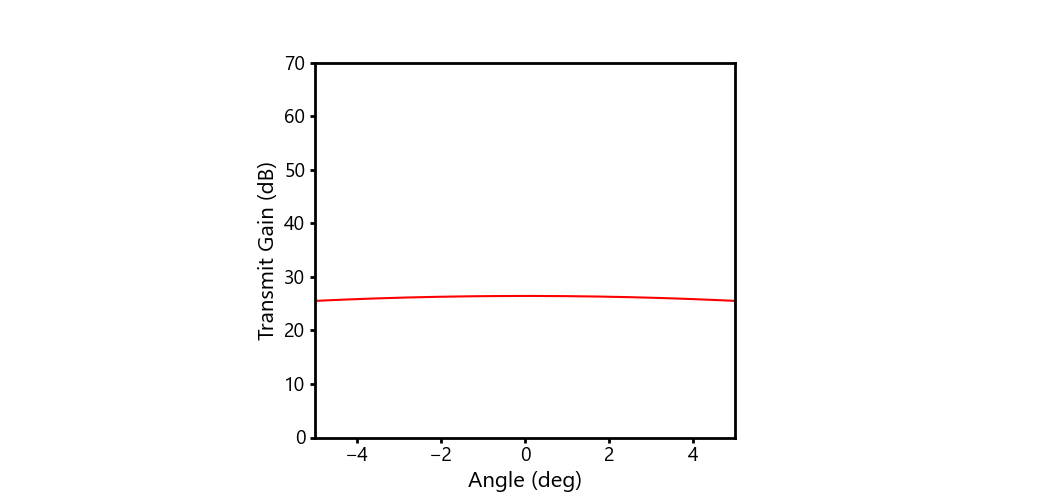

In [11]:
ex.ex_3_1_4()

Beam patterns are primarily dictated by the radar aperture shape; however, it can be further modified by changing how emitted energy is spread over the aperture on transmission and reception. Tailoring the radar transmission to create a desired beam pattern and direction of transmission is commonly referred to as **beamforming**.

In [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we also learned about the idea of *steering*, or choosing the direction to transmit and listen to electromagnetic energy. There were two types of steering discussed:

- *Mechanical*, movement of aperture to change direction of transmission/reception
- *Electronic*, coordinated variation of elements in an array to direct transmitted energy

As the concept of mechanical steering is somewhat straightforward, we will focus on going into more depth on electronic steering for radar systems. The first type of steering used in radar systems is **delay steering**, which changes the transmission time of each element so each transmission will arrive at the target at the same time.

To recall the general view of delay steering, we can look back at a hypothetical array of elements, each emitting an impulse at a different delay where propagation velocity is $v_p = 1000~\mathrm{m/s}$. In the interactive example below, we can see how the delay of each element changes to have all impulse reach the target at the same time. 

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Sensor</b>"), FloatSlider(value=0.0, descr…

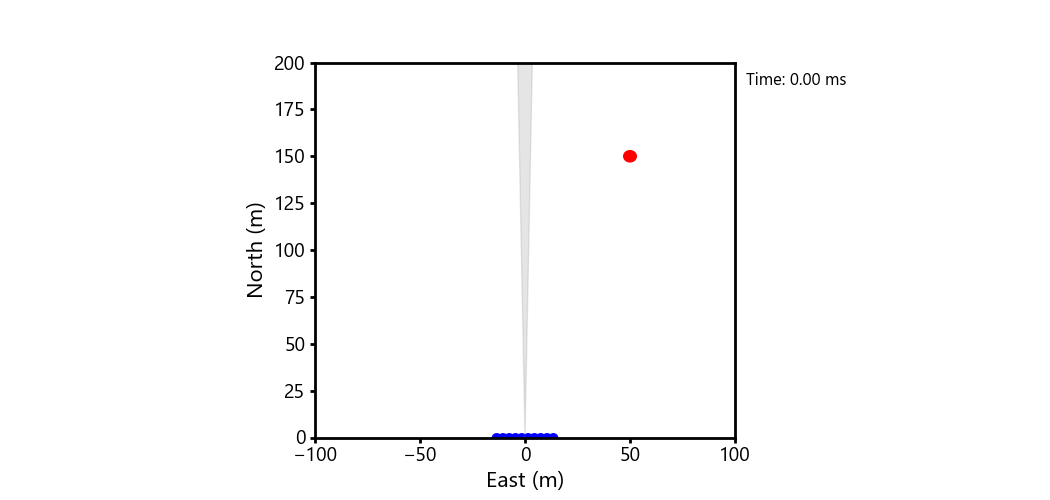

In [12]:
ex.ex_3_1_5()

As discussed above, practical radar systems employ sine waves (and variations thereof) for transmission to be able to spread out energy over a duration and lower necessary power. This means *delay steering* for radar systems is equivalent to designing the element delays so that sine waves transmitted from each element arrive at the target at the same time.

To see how this works, let us look at an interactive example in which we transmit four cycles of a sine wave from each element of a five element array (see figure below).

<div style="text-align: center"> <img src="img/array_steer.png" justify="center" width="400px"></img> </div>

There are two plots in the following example: 

- The upper plot shows all of the different waves from the elements at the moment they arrive at the target; the center is aligned to the wave emitted by the middle element, *Element \#3* (shown as a **black** dashed line)
- The lower plot shows the sum of all of the incident waves; this will be the actual wave that hits the target

We can control the *<font color="DarkBlue">Transmit Frequency</font>* of the radar, the *<font color="DarkBlue">Azimuth</font>* and *<font color="DarkBlue">Range</font>* of the target, and the *<font color="DarkBlue">Delay</font>* of each element (delay is relative to the wave from the middle element, *Element \#3*). We can also choose to hide the wave from each element to be able to focus on a single wave. Additionally, an *<font color="DarkBlue">Energy Loss</font>* is displayed showing the difference between the achieved energy delivered versus the maximum possible energy delivered, i.e., an *<font color="DarkBlue">Energy Loss</font>* of $0~\mathrm{dB}$ means that the maximum energy possible is hitting the target.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=500.…

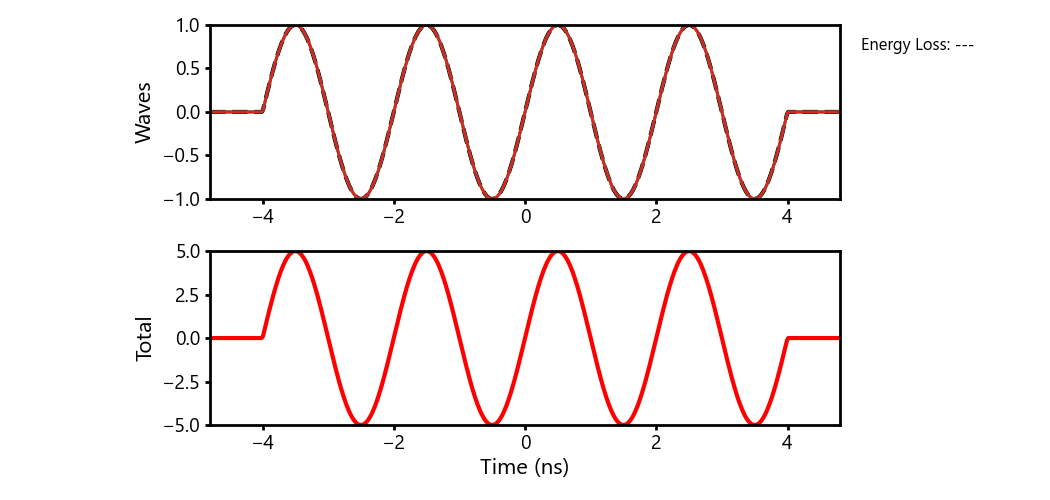

In [13]:
ex.ex_3_1_6()

***

### Question 3

**(a)** What is the delay needed for the *Element \#1* wave to match the reference wave (in **black** dashed line) when the target is at a range of $r = 3~\mathrm{km}$ and azimuth $\theta = 45~\mathrm{deg}$ and the radar transmits at a frequency of $f = 800~\mathrm{MHz}$?

In [14]:
qz.quiz_3_1_3a()

In [15]:
# Scratch space

**(b)** What is the delay needed for the *Element \#1* wave from **(a)** if the frequency is now $f = 1~\mathrm{GHz}$?

In [16]:
qz.quiz_3_1_3b()

In [17]:
# Scratch space

***

Try aligning the waves at different target azimuths and ranges. There are a few important things to notice about delay steering:

- Changing the *<font color="DarkBlue">Transmit Frequency</font>* does not affect the delays. Once you have the waves aligned in a certain direction, that configuration will work for any frequency. Thus, delay steering can work for waves that consist of a large span of frequencies and not only single-frequency sine waves.

- For most geometries and radar parameters, range has no impact on the delays required to align the element waves. However, you may notice that the wave alignment changes slightly and *<font color="DarkBlue">Transmit Frequency</font>* varies as the range gets very small ($\approx 0.1~\mathrm{km}$). This is called being in the **near field** of the radar, where the optimal relative delays not only depend on azimuth but also range. Typically, targets are well beyond this region, in what is called the **far field**<sup>[1](#foot_far)</sup>. 



We can also notice that the delays used are on the order of a few nanoseconds—delaying signals at this timescale requires very precise timing and delay electronics. Another way to achieve a similar effect for sine wave transmissions is *phase steering*. The main concept of phase steering is to transmit from all elements at the same time but change the phase of each sine wave so they match when they reach the target.

In the interactive example below, we use the same five element array we used for delay steering. This time, however, all elements will transmit at the same time, and we can change the phase of each sine wave to try and match the reference wave. Try match the reference wave for different azimuths, ranges, and transmit frequencies.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=500.…

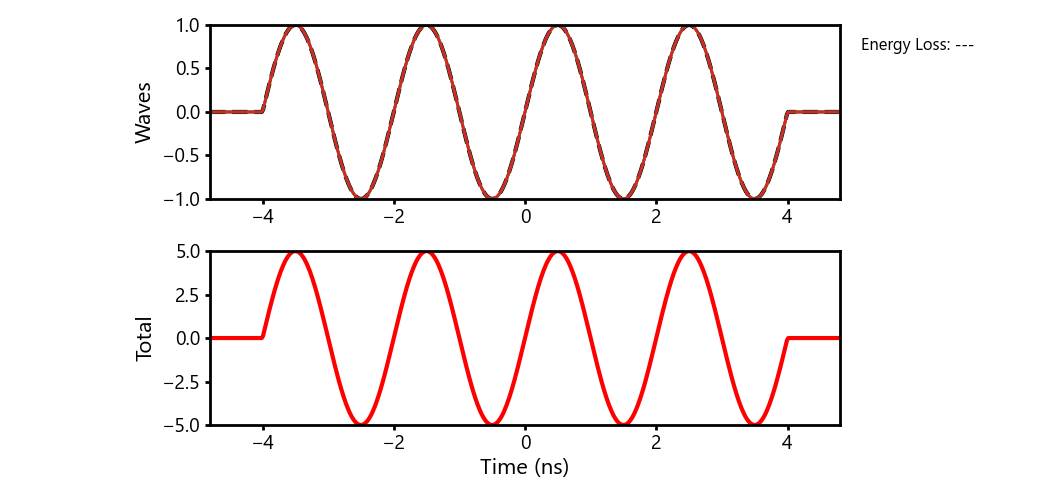

In [18]:
ex.ex_3_1_7()

***

### Question 4

**(a)** What is the phase needed for the *Element \#4* wave to match the reference wave (in **black** dashed line) when the target is at a range of $r = 3~\mathrm{km}$ and azimuth $\theta = 30~\mathrm{deg}$ and the radar transmits at a frequency of $f = 700~\mathrm{MHz}$?

In [19]:
qz.quiz_3_1_4a()

In [20]:
# Scratch space

**(b)** What is the phase needed for the *Element \#4* wave from **(a)** if the frequency is now $f = 500~\mathrm{MHz}$?

In [21]:
qz.quiz_3_1_4b()

In [22]:
# Scratch space

***

Here, we notice a few interesting differences compared to delay steering:

- The phase needed to match an element's transmission to the reference wave *does depend on frequency* (i.e., try aligning and then changing the frequency). This is a major consideration when using phase steering: if using phase steering and a transmit waveform that utilizes a broad range of frequencies, there may be appreciable energy loss due to the fact that the phases are only optimal for a single frequency.

- Since the waves arrive at different times, the edges of the waves are no longer aligned. This causes a small amount of energy loss but is typically negligible as the pulse is often much longer than the mismatched portion.

### Polarization

The last degree-of-freedom for transmission is the orientation of the wave with respect to propagation. We can think of this as the same decision that one can make when making waves using a taut rope: we can go up-and-down, left-and-right, corkscrew, etc. The big difference being that we are making waves using electromagnetics and not tension in a rope.

There are a few common polarizations used in radar systems; the first we will look at is **linear** polarization, where the wave stays in the same plane as it travels outward. This is analogous to the up-and-down and left-and-right waves created in the rope example. Below is an animation of a wave with **vertical** polarization, which varies up and down as it moves outward:

<div style="text-align: center"> <img src="img/vert.gif" justify="center" width="500px"></img> </div>

The other most common type of linear polarization is **horizontal** polarization, where the wave moves in the horizontal plane relative to the radar aperture. Another polarization typically used in radar is **circular** polarization, which moves in a corkscrew shape as it propagates; below is an animation of a circularly polarized wave.

<div style="text-align: center"> <img src="img/circ_pol.gif" justify="center" width="500px"></img> </div>

The polarization of the transmitted wave is completely controlled the choice of transmit antenna; different antenna shapes and configurations leads to differently polarized waves. 

A way to be able to create any polarization is to jointly control a vertically polarized antenna and a horizontally polarized antenna. If we change how energy is distributed between the two and allow for a phase difference, we can generate whatever polarization is desired. To see this, let us look at the following interactive example with some interesting examples to try:

| Polarization        | Orientation Angle (deg) | Phase Difference (deg) |
|---------------------|-------------------------|------------------------|
| Linear, Horizontal  | 0                       | 0                      |
| Linear, Vertical    | 90                      | 0                      |
| Circular, Right-hand| 45                      | 90                     |
| Circular, Left-hand | 45                      | 270                    |

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=100.0, d…

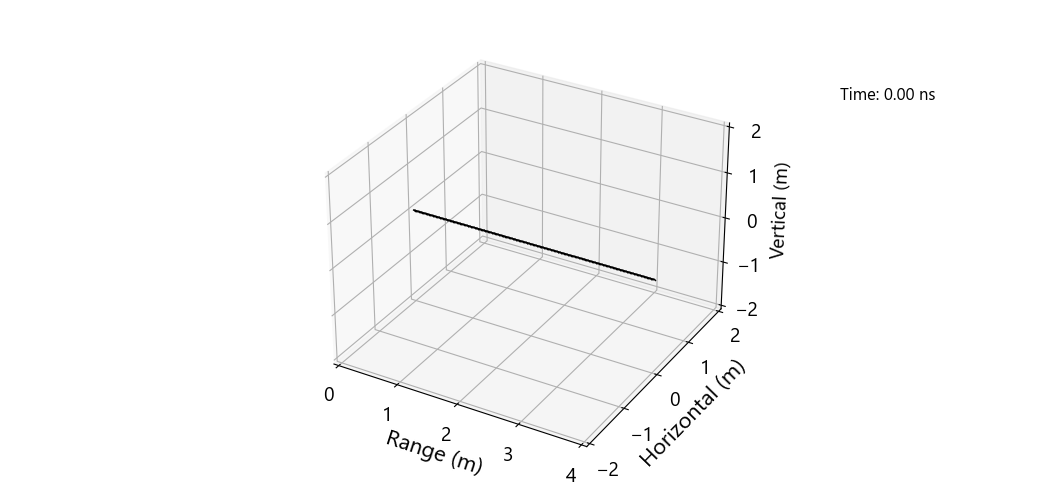

In [23]:
ex.ex_3_1_8()

Differently polarized waves will create different strength echoes from targets based on a target's shape and material properties. For instance, a horizontally polarized wave hitting a long horizontal edge, e.g., an aircraft wing, will create a very strong echo; however, a vertically polarized wave hitting the same horizontal edge will create a very weak echo. Transmit polarization is generally chosen to be able to create strong echoes over the expected targets and geometries.

## Radar Receptions

Just like transmission, there are the same design options when choosing how to listen to incoming signals:

* **Waveform**: Shape of the incoming wave of interest
* **Space**: Region to listen for incoming waves
* **Polarization**: Orientation of the incoming wave of interest relative to direction of travel

We will go over each of these in detail.

### Waveform

For reception, we almost always want to find the waveform that was transmitted. This is akin to using our voice for acoustic ranging and only listening for echoes of the word that we shouted. Finding the presence of the transmitted waveform is called **matched filtering**, because we are filtering out all other signals except those matched to the transmitted wave. (Note that matched filtering is also often called **pulse compression**.)

The good news is that we know the waveform we transmitted because we chose it; the bad news is that we do not know at what time the echo signal will be arriving. This means we have to search over all possible delays for the presence of echoes. Each possible arrival time we will call a **delay hypothesis**. To test for the presence of an echo, we will take an *inner product*<sup>[2](#foot_inner)</sup> of the received signal with the transmitted waveform. An inner product tells us how much one signal is like another; if it is a perfect match, the value will be large, otherwise, the value will be small.

In the following interactive example, we can see how a matched filter works. Try changing the *<font color="DarkBlue">Delay Hypothesis</font>* and watch how the inner product value (shown as a **<font color="red">red</font>** dot in the lower plot) changes; the true echo is in **<font color="blue">blue</font>** and the hypothesized echo is in **<font color="red">red</font>**. When the *<font color="DarkBlue">Delay Hypothesis</font>* is at zero, i.e., a perfect match, the value is at its maximum; otherwise, it trails off. Also, take note on how the *<font color="DarkBlue">Pulsewidth</font>* affects the shape of the output—we will return to this.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Waveform</b>"), FloatSlider(value=0.0, des…

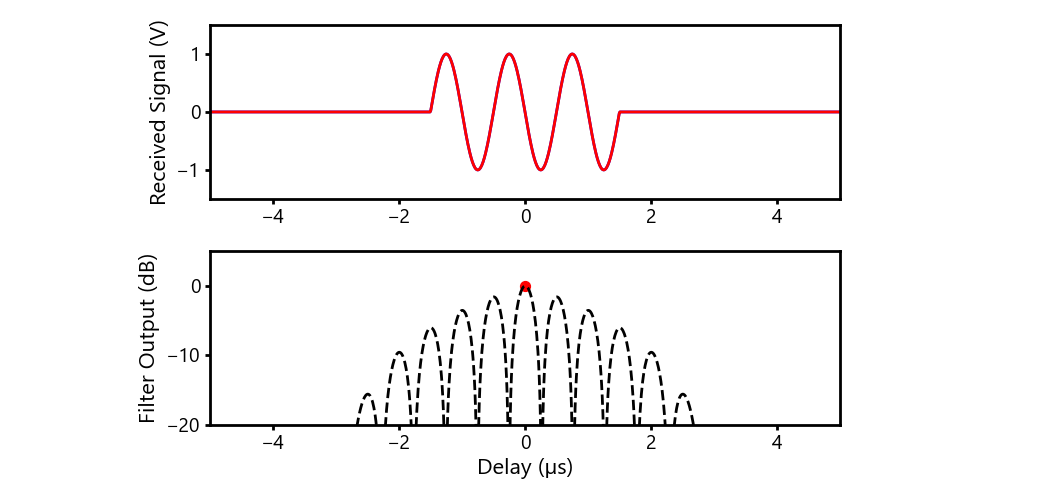

In [24]:
ex.ex_3_1_9()

In the **black** dashed line, we see the curve that the matched filter output takes over all possible delay hypotheses; this is called a **delay profile**. The *delay profile* is key for measuring how well a radar system can resolve different targets. This is because the total received signal will be a superposition of a collection of delay profiles, one for each target at its according range. In particular, we will look at **delay resolution**, $\delta \tau$, which is the minimum distance in time required to confidently discern two echoes.

To see how the delay profile relates to delay resolution, we can look at the following interactive example. In this example, we will look at the filter output over all delay hypotheses when receiving two echoes from variably spaced targets. We can now change the *<font color="DarkBlue">Range Separation</font>* between targets and the *<font color="DarkBlue">Pulsewidth</font>*; the true target ranges are illustrated as **black** dashed lines. Note how the two copies of the delay profile interact as the targets spread apart with increasing *<font color="DarkBlue">Range Separation</font>*.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Waveform</b>"), FloatSlider(value=100.0, d…

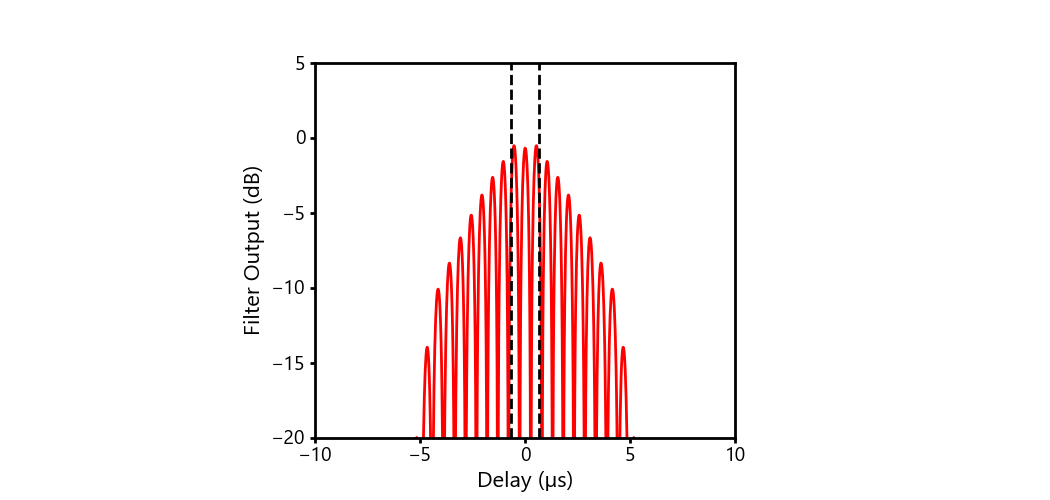

In [25]:
ex.ex_3_1_10()

We can note that as the pulsewidth increases, it becomes more difficult to confidently separate the two target echoes. However, if we shorten the pulsewidth, we will also be lowering the transmit energy, potentially making the echoes too weak to observe. Luckily, there is a way to improve the resolution of targets in delay (i.e., range) without shortening the pulsewidth. To see how this is done, let us revisit the matched filter output interactive example, but now we are using a LFM waveform with an adjustable *<font color="DarkBlue">Start Frequency</font>* and *<font color="DarkBlue">Stop Frequency</font>*. Watch what happens to the delay profile shape when adjusting the span of frequencies used by the LFM waveform.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Waveform</b>"), FloatSlider(value=0.0, des…

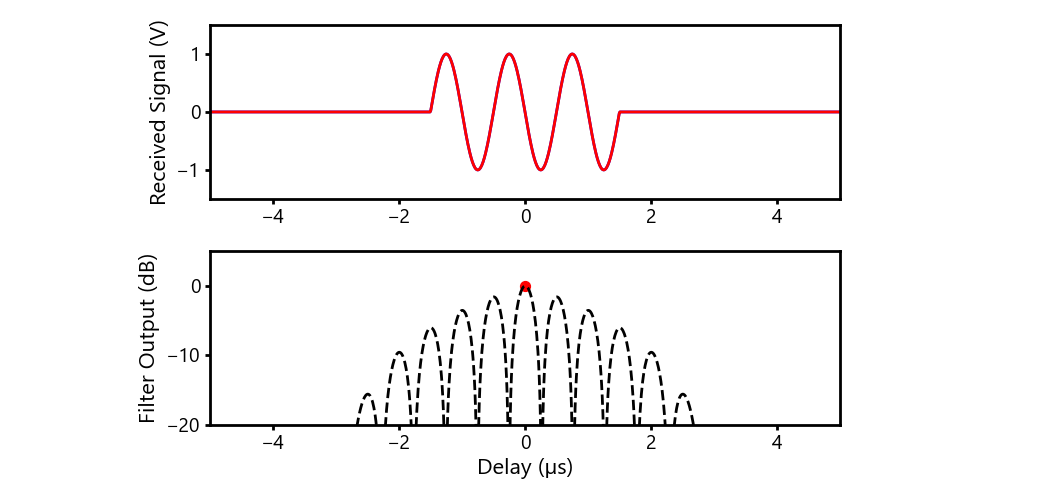

In [26]:
ex.ex_3_1_11()

As the spread of frequencies increase, the delay profile narrows, which will improve the ability to resolve targets in range. The spread of frequency content of a waveform (i.e., the distance between the start and stop frequencies) is called its **bandwidth**, $B$. It can be shown<sup>[[1]](#ref_skolnik)</sup> that the delay resolution, $\delta \tau$ , is:

$$
\delta \tau = \frac{1}{B}
$$

Likewise, we can use this result and the relationship between delay and range $r = c\tau/2$ to derive the **range resolution** (i.e., distance required in range to confidently resolve two target echoes), $\delta r$ , as:

$$
\delta r = \frac{c}{2B}
$$

For example, if we use an LFM waveform that spans a bandwidth of $B = 300~\mathrm{MHz}$, the minimum distance needed to resolve to targets in range is:

$$
\begin{align}
\delta r &= \frac{c}{2B}\\
&= \frac{3\times 10^8}{2\cdot 3\times 10^8}\\
&= 0.5~\mathrm{m}
\end{align}
$$

Let us revisit the delay resolution example but now with an LFM waveform. Note how we can improve resolution of the targets by increasing the bandwidth of the signal. Another important property to notice is that at bandwidths  greater than $1~\mathrm{MHz}$, the pulsewidth has very little effect on the delay resolution. This is a powerful result as it means we can have long pulsewidths to impart large amounts of transmit energy while also controlling our delay and range resolution using bandwidth.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Waveform</b>"), FloatSlider(value=100.0, d…

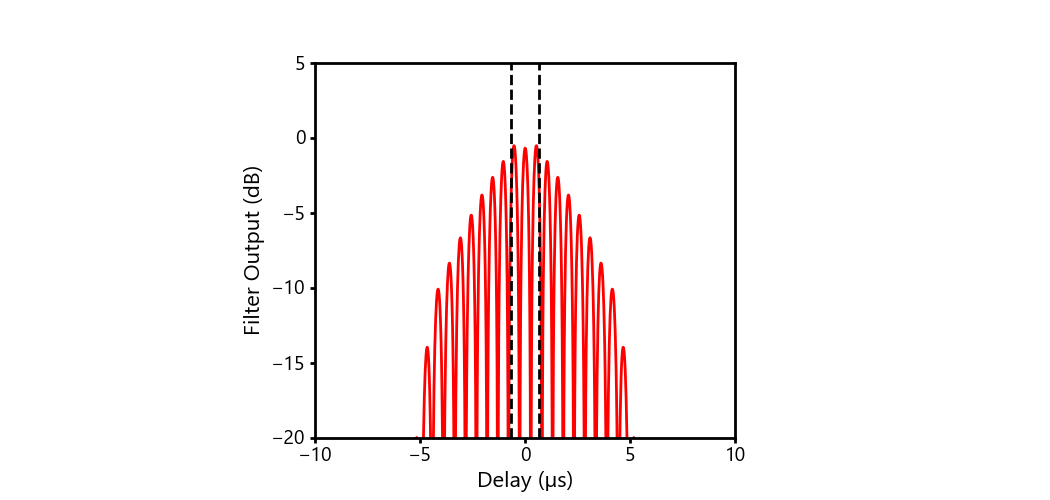

In [27]:
ex.ex_3_1_12()

One thing to note is that increasing the bandwidth of the waveform does come with a cost implication for the radar. Higher bandwidth transmit waveforms require more sophisticated equipment for generation and amplification of the signal to be transmitted along with more advanced receiver hardware to appropriately process the echo signals.

***

### Question 5

What transmit waveform bandwidth, $B$ , is required to be able to discern targets with a range separation of at least $\delta r = 10~\mathrm{m}$?

In [28]:
qz.quiz_3_1_5()

In [29]:
# Scratch space

***

Thus, the bandwidth of the transmit waveform is the primary driver for how well we can resolve to targets in range; this is why *modulation* of the transmit waveform is performed: to spread the waveform to a span of frequencies and, therefore, designing the range resolution capability of the radar.

### Space

Just as we did with the waveform used for reception, we will typically match the spatial degree-of-freedom on reception to the spatial degree-of-freedom on transmit. This means that we will only listen for echoes in the region of space in which we transmitted energy.

Focusing and steering are performed in the exact same way as transmit:

- Focusing is performed by using a receive aperture to collect signals from a swath of angle in space
- Steering is performed by either moving the aperture (i.e., mechanical) or appropriately combining the outputs of elements of a receive array (i.e., electronic); phase and delay steering calculations are done in an identical manner to transmission.

### Polarization

Similar to transmit polarization, receive polarization is dictated by the antenna hardware used for reception. Further, the polarization characteristics of the radar are chosen, if possible, to match the polarization of target echoes to strengthen their presence in the received signals. Note that there may be other emissions present that polarization is chosen to suppress on reception, e.g., echoes from buildings or a sea surface, emissions from other sensors.

## Integration

One last important topic relating to transmission and receptions are their *combination*. Let us say we have reached the limit of our budget for building a radar but still need to observe targets beyond our designed sensitivity. One way to achieve this is through combining multiple received signals in a process called **integration**.

Integration relies on the fact that, for each target observation, the shape and characteristics of target echo will be remain largely the same; the noise, however, is random from observation to observation. We can exploit this fact and average out the effect of the noise by adding together received pulses (see figure below). Note that if the target is moving quickly, we will have to account for the Doppler effect during integration—this will be covered in [Lab 4.1: Target Parameter Estimation](4_2_Target_Parameter_Estimation.ipynb).

<div style="text-align: center"> <img src="img/integ.png" justify="center" width="600px"></img> </div>

There are two types of integration: 

- **Coherent integration**: Uses phase and amplitude information from the incoming echoes when averaging over multiple observations
- **Noncoherent integration**: Uses only amplitude information from the incoming echoes when averaging over multiple observations

For coherent integration using $N$ observations, the resulting signal-to-noise ratio after integration, $\mathrm{SNR}_{c}$ , compared to a single pulse SNR, $\mathrm{SNR}_0$ , will be:

$$
\mathrm{SNR}_{c} = N \cdot \mathrm{SNR}_0
$$

Thus, we can achieve an $N$-fold improvement in SNR via coherent integration with $N$ pulses. 

Coherent integration requires certain stability guarantees in radar hardware that may increase cost prohibitively. In that case, noncoherent integration can be used; noncoherent integration is more robust to radar system instabilities, but the gain in SNR will be appreciably smaller. A rough estimate of the resulting SNR for noncoherent integration, $\mathrm{SNR}_{n}$ , is:

$$
\mathrm{SNR}_{n} \approx \sqrt{N} \cdot \mathrm{SNR}_0
$$


## Robby Revisited

To see how some of the topics discussed above, e.g., waveform bandwidth, integration, affect the output of a radar, we will again look at Robby the test radar. We can now define Robby in terminology we have recently learned:

- **Waveform**: Robby uses a LFM waveform for transmission and performs matched filtering on receive; the display shows the output of the matched filter
- **Space**: Robby focuses energy using a dish to create a circular aperture and then performs mechanical steering to rotate
- **Polarization**: Robby uses vertical polarization on transmit and vertical polarization on receive; we will not see enough target detail in this course to exercise other polarizations

As compared to [Lab 2.2: Basic Radar Design](2_2_Basic_Radar_Design.ipynb), there are a few new knobs that can be adjusted when designing the transmission and processing receptions:

- *<font color="DarkBlue">Bandwidth</font>*: Bandwidth of the transmitted waveform; dictates the range resolution of the radar system
- *<font color="DarkBlue">Number of Integrated Pulses</font>*: Number of pulses used in integration; a value of one means no integration is performed
- *<font color="DarkBlue">Number of Integrated Pulses</font>*: Toggles whether coherent or noncoherent integration is used

Again there is a test target at azimuth $\theta = 45~\mathrm{deg}$ and range $r = 6~\mathrm{km}$. First, adjust *<font color="DarkBlue">Dish Radius</font>*, *<font color="DarkBlue">Transmit Energy</font>*, and *<font color="DarkBlue">Transmit Energy</font>* to be able to see the target. Then, adjust the new parameters to see how the radar output changes. Note that the display of Robby is actually showing the matched filter output discussed above.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=1000.0, des…

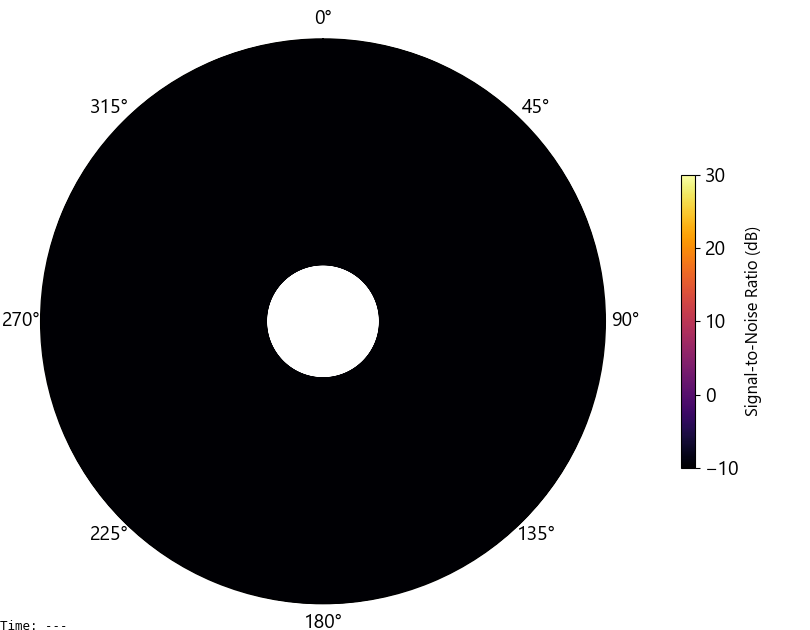

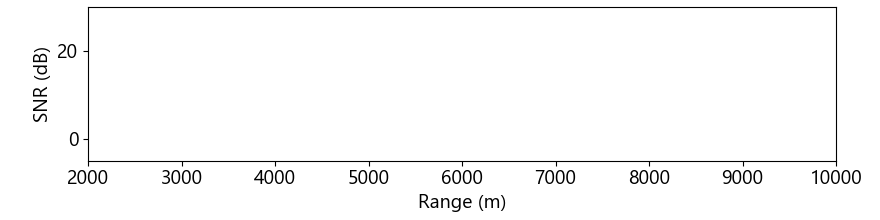

In [30]:
ex.ex_3_1_13()

## Summary

In this lab, we covered the decisions made by the transmitter, which decides how and where to transmit energy, and the receiver, which decides how and where to listen for echoes. For both transmission and reception, the degrees-of-freedom are:

- Waveform
- Space
- Polarization

<div style="text-align: center"> <img src="img/tx_dof.png" justify="center" width="900px"></img> </div>

Typically, all the receive degrees-of-freedom are chosen to match the transmit degrees-of-freedom. For the waveform, this comes in the form of a matched filter, which looks for the presence of echoes of the transmit waveform. By analyzing the performance of a matched filter, we saw that the ability to resolve two targets in range is dictated by the bandwidth of the transmit waveform, i.e., its span of frequencies.

Additionally, multiple observations can be combined via integration, or averaging, to improve the signal-to-noise ratio. This can be done both using phase information, i.e., coherent, and without, i.e., noncoherent.

## Footnotes

<a id="foot_far"><sup>1</sup></a>The range at which the far field starts for an aperture, $r_f$, (called the **Fraunhofer distance**) is defined as:

$$
r_f = \frac{2D^2}{\lambda}
$$

where $D$ is the largest extent of the aperture (in $\mathrm{m}$) and $\lambda$ is the transmit wavelength (in $\mathrm{m}$). We can see that $r_f$ increases with frequency and aperture size.

<a id="foot_inner"><sup>2</sup></a>The inner product is the same notion as the *dot product* in linear algebra. For vectors (and discrete signals), this is simply multiplying entries and summing over the products. For continuous signals, this is done via multiplication and integration. Luckily, calculating the inner product over a range of possible delay hypotheses can be made very efficient using a fast Fourier transform.

## References

<a id="ref_skolnik">[1]</a> M. I. Skolnik, “Theoretical accuracy of radar measurements,” *IRE Transactions on Aeronautical and Navigational Electronics*, vol. 7, no. 4, pp. 123–129, Dec. 1960.